<a href="https://colab.research.google.com/github/jnprogrammer/MachineLearning/blob/master/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [0]:
# build the model
i = Input(shape=x_train[0].shape)
x = LSTM(28)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.6963 - accuracy: 0.7774 - val_loss: 0.3378 - val_accuracy: 0.8999
Epoch 2/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.2507 - accuracy: 0.9277 - val_loss: 0.1719 - val_accuracy: 0.9495
Epoch 3/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.1689 - accuracy: 0.9509 - val_loss: 0.1646 - val_accuracy: 0.9536
Epoch 4/10
60000/60000 [==============================] - 31s 513us/sample - loss: 0.1306 - accuracy: 0.9611 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 5/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.1086 - accuracy: 0.9678 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 6/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0938 - accuracy:

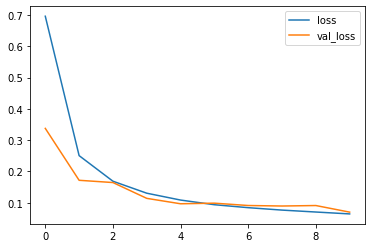

In [12]:
#loss per iteration

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

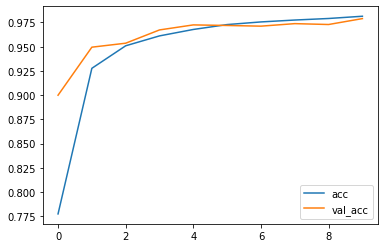

In [13]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 971    0    0    0    1    0    4    1    2    1]
 [   0 1125    4    1    1    0    1    0    3    0]
 [   5    0 1013    2    0    0    3    4    4    1]
 [   0    0    6  986    0    7    0    4    2    5]
 [   1    0    0    1  953    1    5    4    1   16]
 [   4    0    0    7    1  874    1    1    2    2]
 [   5    3    1    0    4    5  937    0    3    0]
 [   1    2   10    4    1    0    0 1005    2    3]
 [   7    0    4    3    2   10    1    3  942    2]
 [   3    1    2    3    4    3    3    3    3  984]]


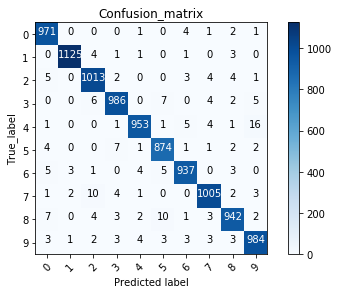

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix,
  Normalization cna be applided by setting normalize=True
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axit=i)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = "center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

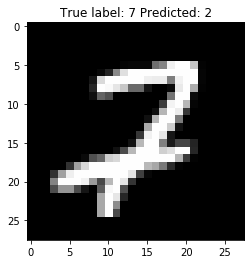

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));